In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-hr-burnout-dataset/synthetic_employee_burnout.csv


# Dataset: synthetic-hr-burnout-datas
This dataset simulates employee-level data for burnout prediction and classification tasks. It can be used for binary classification, exploratory data analysis (EDA), and feature importance exploration.

## 📄 Columns
* Name — Synthetic employee name (for realism, not for ML use).

* Age — Age of the employee.

* Gender — Male or Female.

* JobRole — Job type (Engineer, HR, Manager, etc.).

* Experience — Years of work experience.

* WorkHoursPerWeek — Average number of working hours per week.

* RemoteRatio — % of time spent working remotely (0–100).

* SatisfactionLevel — Self-reported satisfaction (1.0 to 5.0).

* StressLevel — Self-reported stress level (1 to 10).

* Burnout — Target variable. 1 if signs of burnout exist (high stress + low satisfaction + long hours), otherwise 0.

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploratory

In [3]:

path = '/kaggle/input/synthetic-hr-burnout-dataset/synthetic_employee_burnout.csv'
df = pd.read_csv(path)
df = df.convert_dtypes(dtype_backend='numpy_nullable')

df.head()

,Name,Age,Gender,JobRole,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
0,Max Ivanov,32,Male,Analyst,3,60,21,4.4,1,0
1,Max Wang,40,Female,Engineer,9,47,67,2.09,2,0
2,Nina Petrov,33,Female,Engineer,2,44,20,2.58,3,0
3,John Ivanov,35,Female,Manager,6,44,70,3.23,8,0
4,John Wang,59,Male,Sales,8,38,46,4.41,1,0


In [4]:
df.describe()

,Age,Experience,WorkHoursPerWeek,RemoteRatio,SatisfactionLevel,StressLevel,Burnout
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,40.6945,10.0745,49.588,49.973,2.99523,5.432,0.0645
std,11.286756,9.148267,11.832424,29.151298,1.155431,2.88089,0.245703
min,22.0,0.0,30.0,0.0,1.0,1.0,0.0
25%,31.0,3.0,39.0,24.0,2.0,3.0,0.0
50%,41.0,7.0,49.0,49.0,3.025,5.0,0.0
75%,50.0,15.0,60.0,75.0,4.0,8.0,0.0
max,60.0,39.0,70.0,100.0,5.0,10.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2000 non-null   string 
 1   Age                2000 non-null   Int64  
 2   Gender             2000 non-null   string 
 3   JobRole            2000 non-null   string 
 4   Experience         2000 non-null   Int64  
 5   WorkHoursPerWeek   2000 non-null   Int64  
 6   RemoteRatio        2000 non-null   Int64  
 7   SatisfactionLevel  2000 non-null   Float64
 8   StressLevel        2000 non-null   Int64  
 9   Burnout            2000 non-null   Int64  
dtypes: Float64(1), Int64(6), string(3)
memory usage: 170.1 KB


In [6]:
df['JobRole'].unique(), df['Gender'].unique()

(<StringArray>
 ['Analyst', 'Engineer', 'Manager', 'Sales', 'HR']
 Length: 5, dtype: string,
 <StringArray>
 ['Male', 'Female']
 Length: 2, dtype: string)

In [7]:
df['JobRole'].value_counts(sort='False', normalize='True')

JobRole
Manager     0.2095
Analyst     0.2065
Sales       0.1955
HR          0.1955
Engineer     0.193
Name: proportion, dtype: Float64

In [8]:
df['StressLevel'].value_counts(sort='True', normalize='True')

StressLevel
1       0.11
9      0.107
8      0.104
4        0.1
2     0.0995
3     0.0995
6     0.0985
5      0.098
7     0.0955
10     0.088
Name: proportion, dtype: Float64

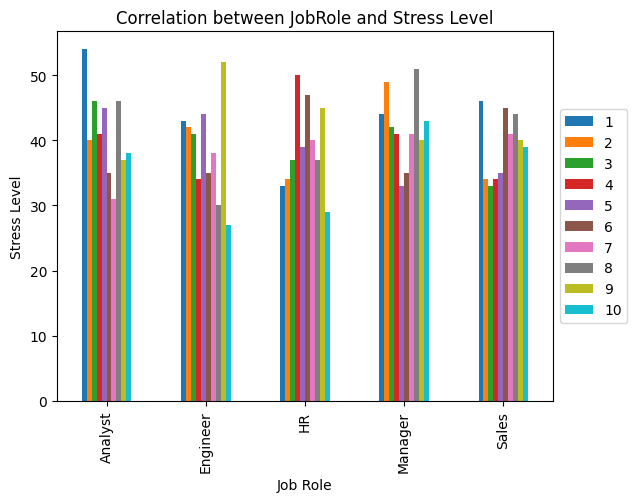

In [9]:
pd.crosstab(df.JobRole, df.StressLevel).plot(kind='bar')
plt.title('Correlation between JobRole and Stress Level')
plt.xlabel('Job Role')
plt.ylabel('Stress Level')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

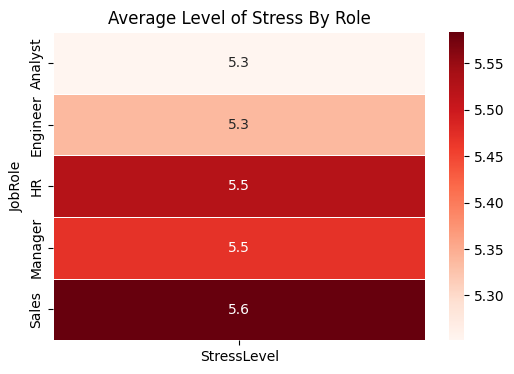

In [10]:
pivotRoleStress = df.groupby('JobRole')['StressLevel'].mean().reset_index()
heatmap_RolStr = pivotRoleStress.pivot_table(index='JobRole', values='StressLevel')

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_RolStr, annot=True, cmap="Reds", linewidths=0.5)
plt.title("Average Level of Stress By Role")
plt.show()

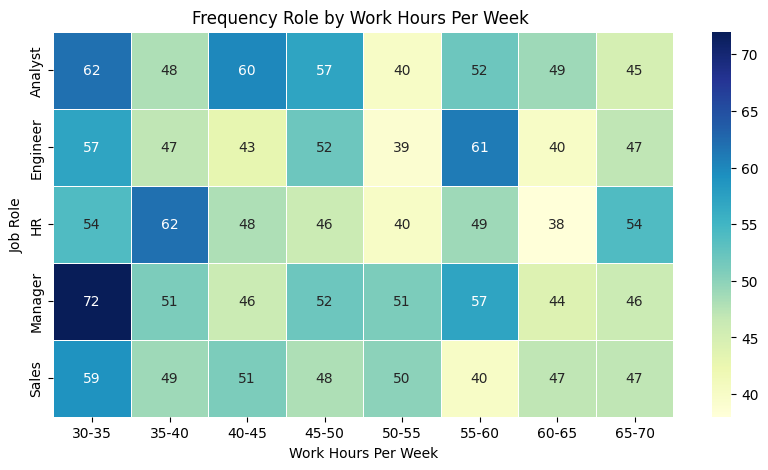

In [11]:
bins = list(range(30, 75, 5))
labels = [f'{b}-{b+5}' for b in bins[:-1]]
df['HoursBin'] = pd.cut(df['WorkHoursPerWeek'], bins=bins, labels=labels, include_lowest=True)

pivotRoleHours = pd.crosstab(df['JobRole'], df['HoursBin'])

plt.figure(figsize=(10, 5))
sns.heatmap(pivotRoleHours, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Frequency Role by Work Hours Per Week ')
plt.xlabel('Work Hours Per Week')
plt.ylabel('Job Role')
plt.show()

In [12]:
highstressburnout = df.loc[(df.StressLevel >= 8)& (df.Burnout == 1),['StressLevel', 'Burnout', 'WorkHoursPerWeek', 'SatisfactionLevel', 'JobRole']]
highstressburnout

,StressLevel,Burnout,WorkHoursPerWeek,SatisfactionLevel,JobRole
59,9,1,56,2.31,Engineer
86,9,1,53,2.73,Sales
91,10,1,52,1.19,HR
146,9,1,59,1.66,Engineer
158,9,1,65,2.18,Sales
...,...,...,...,...,...
1917,8,1,60,1.89,Analyst
1921,8,1,61,2.49,Analyst
1963,8,1,59,2.09,Sales
1979,8,1,61,2.67,Analyst


129 employees indicate that they have burnout and according to the following analysis, employees with burnout have a stress level greater than 8.<p>
But that cannot be the reason, since there are 469 employees with a stress level greater than 8 who do not present burnout.

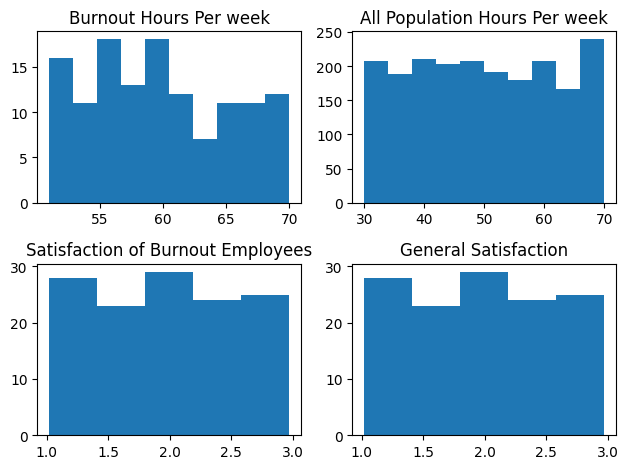

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].hist(highstressburnout['WorkHoursPerWeek'], bins=10)
ax[0,0].set_title('Burnout Hours Per week')

ax[0,1].hist(df['WorkHoursPerWeek'], bins=10)
ax[0,1].set_title('All Population Hours Per week')

ax[1,0].hist(highstressburnout['SatisfactionLevel'], bins=5)
ax[1,0].set_title('Satisfaction of Burnout Employees')

ax[1,1].hist(highstressburnout['SatisfactionLevel'], bins=5)
ax[1,1].set_title('General Satisfaction')

fig.tight_layout()
plt.show()

The satisfaction between employees with burnout and employees without burnout is very similar, but the number of working hours per week does have a significant difference.

## Let's do some machine learning stuff 🪛

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = ['Age', 'Gender', 'JobRole', 'Experience', 'WorkHoursPerWeek',
            'RemoteRatio', 'SatisfactionLevel', 'StressLevel']
target = 'Burnout'

data = df[features + [target]].copy()
data = pd.get_dummies(data, columns=['Gender', 'JobRole'], drop_first=True)

X = data.drop(columns=target)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

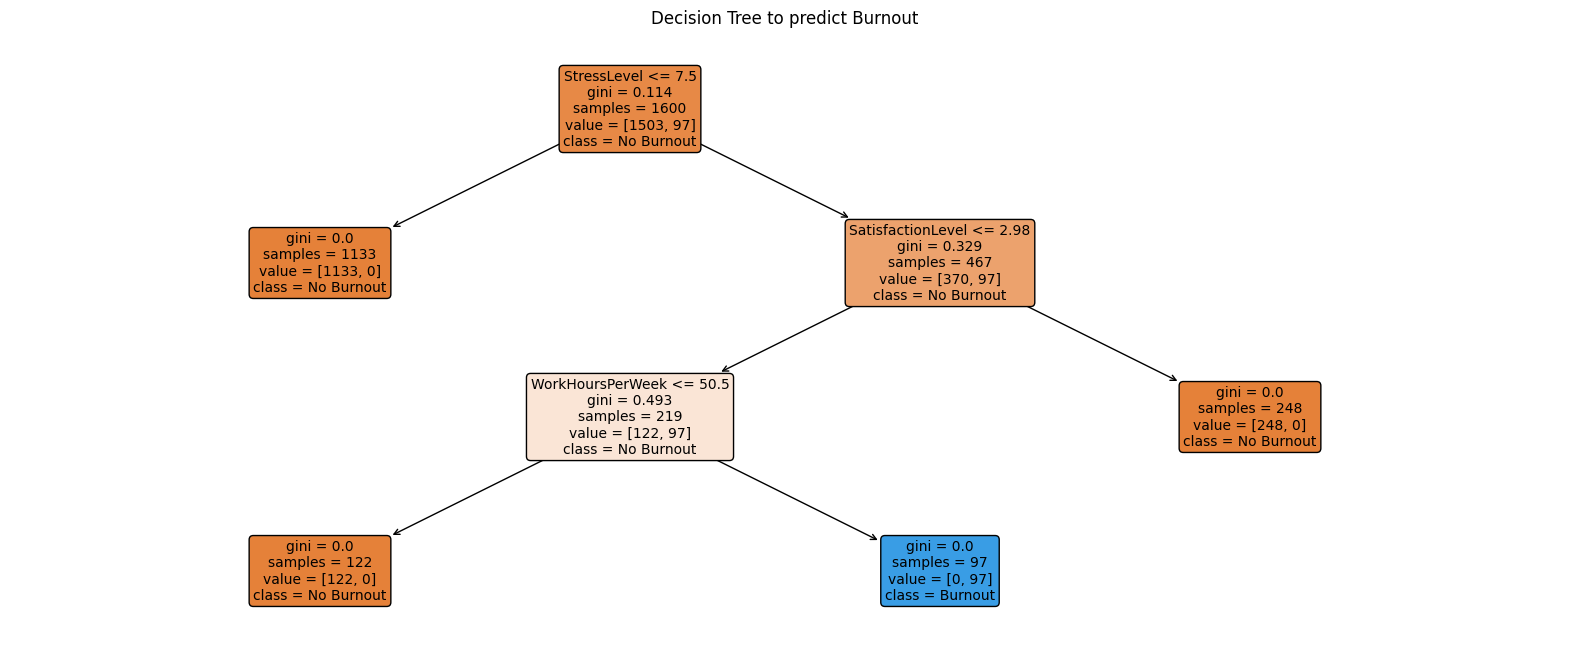

In [15]:
plt.figure(figsize=(20,8))
plot_tree(clf, feature_names=X.columns, class_names=['No Burnout', 'Burnout'],
         filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree to predict Burnout')
plt.show()

The Decision Tree seems to support our suspicions: the number of hours worked per week has a strong impact on whether or not an employee experiences burnout.

## Importance of variables

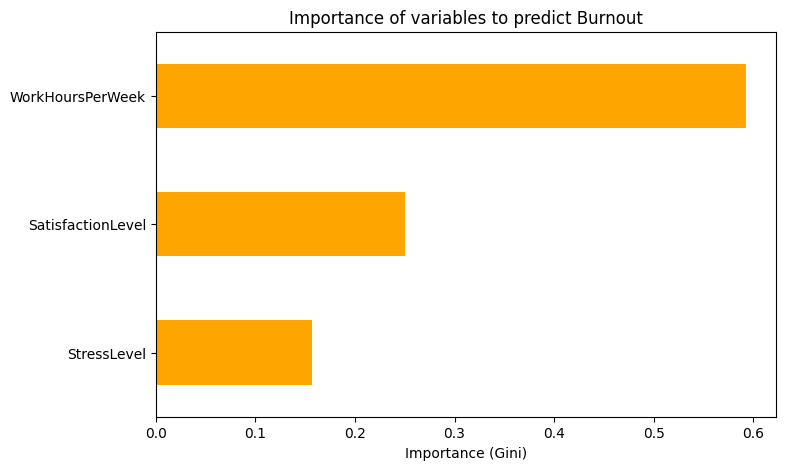

In [16]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance = feature_importance[feature_importance > 0].sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh', color='orange')
plt.title('Importance of variables to predict Burnout')
plt.xlabel("Importance (Gini)")
plt.show()